scikit-learn决策树算法类库内部实现是使用了调优过的CART树算法，既可以做分类，又可以做回归。分类决策树的类对应的是DecisionTreeClassifier，而回归决策树的类对应的是DecisionTreeRegressor。两者的参数定义几乎完全相同，但是意义不全相同。下面就对DecisionTreeClassifier和DecisionTreeRegressor的重要参数做一个总结，重点比较两者参数使用的不同点和调参的注意点。

**<h3>DecisionTreeClassifier和DecisionTreeClassifier 重要参数调参注意点</h3>**

![](images\2.png)

1）当样本少数量但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型
2）如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。
3）推荐多用决策树的可视化（下节会讲），同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。
4）在训练模型先，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。
5）决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。
6）如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。

**<h3>scikit-learn决策树</h3>**

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [4]:
"""
np.meshgrid()
将两个一维数组（x轴和y轴坐标）转换为二维网格矩阵：

xx：网格点的 x坐标矩阵，形状为 (len(y), len(x))。
yy：网格点的 y坐标矩阵，形状与 xx 相同。
作用：生成覆盖整个绘图区域的密集点网格，用于后续预测

"""
a,b = np.meshgrid(np.arange(1, 2, 0.1),
                     np.arange(1, 3, 0.1))

a

array([[1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9

In [5]:
np.c_[a.ravel(), b.ravel()]

array([[1. , 1. ],
       [1.1, 1. ],
       [1.2, 1. ],
       [1.3, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.6, 1. ],
       [1.7, 1. ],
       [1.8, 1. ],
       [1.9, 1. ],
       [1. , 1.1],
       [1.1, 1.1],
       [1.2, 1.1],
       [1.3, 1.1],
       [1.4, 1.1],
       [1.5, 1.1],
       [1.6, 1.1],
       [1.7, 1.1],
       [1.8, 1.1],
       [1.9, 1.1],
       [1. , 1.2],
       [1.1, 1.2],
       [1.2, 1.2],
       [1.3, 1.2],
       [1.4, 1.2],
       [1.5, 1.2],
       [1.6, 1.2],
       [1.7, 1.2],
       [1.8, 1.2],
       [1.9, 1.2],
       [1. , 1.3],
       [1.1, 1.3],
       [1.2, 1.3],
       [1.3, 1.3],
       [1.4, 1.3],
       [1.5, 1.3],
       [1.6, 1.3],
       [1.7, 1.3],
       [1.8, 1.3],
       [1.9, 1.3],
       [1. , 1.4],
       [1.1, 1.4],
       [1.2, 1.4],
       [1.3, 1.4],
       [1.4, 1.4],
       [1.5, 1.4],
       [1.6, 1.4],
       [1.7, 1.4],
       [1.8, 1.4],
       [1.9, 1.4],
       [1. , 1.5],
       [1.1, 1.5],
       [1.2,

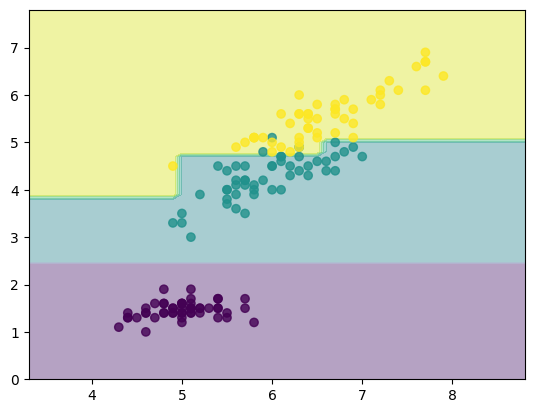

In [6]:
# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

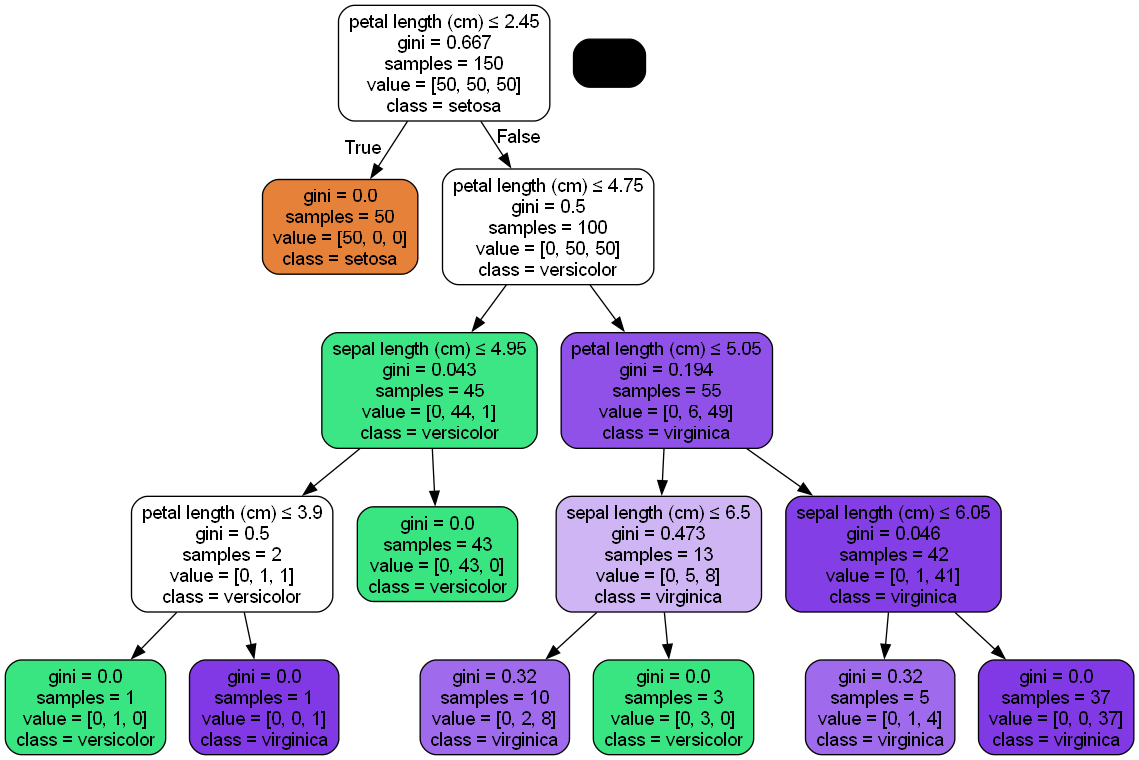

In [7]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
import graphviz

# 定义实际使用的特征名（必须与X的列对应）
used_feature_names = [iris.feature_names[0], iris.feature_names[2]]
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=used_feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 